# **Proyek Analisis Data: Bike-sharing-dataset**
 - **Nama:AZIDIN SURYADI**
 - **Email:dinzzz51@gmail.com**
 - **ID Dicoding:adi_suryadi94**

## **Menentukan Pertanyaan Bisnis**

- Pertanyaan 1 : Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja (workingday) dan akhir pekan/libur?
- Pertanyaan 2 : Bagaimana faktor cuaca (weathersit) memengaruhi jumlah penyewaan sepeda harian?
- Pertanyaan 3 : Berapa banyak Total Penyewaan Setiap Disetiap Bulannya?


## **Import Semua Packages/Library yang Digunakan**

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **1. Data Wrangling**

### 1.1 Gathering Data

In [12]:
day = pd.read_csv('data/day.csv')
hour = pd.read_csv('data/hour.csv')

data = {'day': day,
        'hour': hour}

In [13]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


menampilkan informasi 5 data teratas dari dataset **day**

---

In [14]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


menampilkan informasi 5 data teratas dari dataset **hour**

---

**Insight:**
- Bisa kita lihat bahwasanya dengan *.head()* akan menampilkan 5 data teratas
- Terdapat beberapa colomn seperti *dteday, season, casual, registered*, dsb. yang bisa kita gunakan untuk menganalisis selanjutnya

---

### 1.2 Assessing Data

- 1.2.1 Memeriksa semua tipe data

In [16]:
for df_name, df in data.items():
    print(f"\n{df_name} Information:")
    print(data[df_name].info())


day Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

hour Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

Semua nilai telah terisi lengkap, tidak terdapat nilai kosong (*null value*) pada tabel **day** maupun **hour**

---

- 1.2.2 Memeriksa data duplikat

In [17]:
duplicate_counts = {}
total_sample_counts = {}

for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Jumlah Duplikat'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Jumlah Sampel'])

pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Jumlah Sampel,Jumlah Duplikat
day,731,0
hour,17379,0


Kedua datasetnya tidak ada yang duplikat

---

- 1.2.3 Memeriksa Nilai yang Hilang

In [18]:
null_counts = {}

for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



Tidak ada nilai yang hilang *(missing value)* di kedua dataset

---

In [19]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Ini adalah parameter statistik dari kolom numerik yang terdapat didalam data **day**

---

In [20]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Ini adalah parameter statistik dari kolom numerik yang terdapat didalam data **hour**

---

**Insight:**
- Memeriksa dan menelusuri data yang hilang maupun kosong terhadap dataset **day** dan **hour**
- Semua data terisi dan tidak hilang
- Tidak memiliki data yang terduplikasi

---

### 1.3 Cleaning Data

saya memeriksa datanya terlebih dahulu;

In [21]:
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Disini saya memeriksa kembali agar tabel **day** tidak ada nilai yang kosong, maka dari itu tidak perlu ada nilai yang harus diisi

---

In [22]:
print(hour.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Disini saya memeriksa kembali agar tabel **hour**  tidak ada nilai yang kosong, maka dari itu tidak perlu ada nilai yang harus diisi

---

1.3.1 Ubah Tipe Data

In [23]:
for df_name, df in data.items():
    print(f'\n=== Informasi untuk DataFrame {df_name} ===')
    print(df.info())


=== Informasi untuk DataFrame day ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

=== Informasi untuk DataFrame hour ===
<class 'p

Menampilkan kolom dan tipe data apa saja yang terisi di dalam data **day** dan **hour**

---

In [24]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day[column] =  day[column].astype("category")
    hour[column] =  hour[column].astype("category")

Yang saya ubah disini adalah kolom *season, mnth, holiday, weekday, weathersit* dari *int* menjadi *category* karena kolom ini akan saya gunakan untuk analisis dan menjawab pertanyaan dan memiliki data dengan beberapa varian

---

In [25]:
day.describe(include=['category'])

,season,mnth,holiday,weekday,weathersit
count,731,731,731,731,731
unique,4,12,2,7,3
top,3,1,0,0,1
freq,188,62,710,105,463


Mendeskripsikan data **day** untuk *category*

---

In [26]:
hour.describe(include=['category'])

,season,mnth,holiday,weekday,weathersit
count,17379,17379,17379,17379,17379
unique,4,12,2,7,4
top,3,5,0,6,1
freq,4496,1488,16879,2512,11413


Mendeskripsikan data **hour** untuk *category*

---

In [27]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [28]:
print("Tipe data kolom 'dteday' di DataFrame day :", day['dteday'].dtype)
print("Tipe data kolom 'dteday' di DataFrame hour :", hour['dteday'].dtype)

Tipe data kolom 'dteday' di DataFrame day : datetime64[ns]
Tipe data kolom 'dteday' di DataFrame hour : datetime64[ns]


Saya merubah kolom dteday yang tadinya *object* menjadi *datetime*

---

In [29]:
print(day['dteday'].describe())
print(hour['dteday'].describe())

count                    731
mean     2012-01-01 00:00:00
min      2011-01-01 00:00:00
25%      2011-07-02 12:00:00
50%      2012-01-01 00:00:00
75%      2012-07-01 12:00:00
max      2012-12-31 00:00:00
Name: dteday, dtype: object
count                            17379
mean     2012-01-02 04:08:34.552045568
min                2011-01-01 00:00:00
25%                2011-07-04 00:00:00
50%                2012-01-02 00:00:00
75%                2012-07-02 00:00:00
max                2012-12-31 00:00:00
Name: dteday, dtype: object


Ini adalah hasil perubahan *object* menjadi *datetime* supaya lebih mudah digunakan untuk manipulasi waktu (seperti ekstraksi hari, bulan, tahun, dll.).

---

In [30]:
for df_name, df in data.items():
    print(f'\n~~~ Informasi untuk DataFrame {df_name} ~~~')
    print(df.info())


~~~ Informasi untuk DataFrame day ~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64  

Ini adalah Informasi terkini terkait dataframe apa saja yang ada di data saya

---

1.3.2 Rename

Saya akan merubah nama pada kolom di data **day** dan **hour** agar lebih mudah untuk dibaca

In [31]:
day.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [32]:
hour.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [33]:
for df_name, df in data.items():
    print(f'\n=== Kolom-kolom dalam {df_name} ===')
    print(df.columns.tolist())


=== Kolom-kolom dalam day ===
['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'one_of_week', 'workingday', 'weather_situation', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_cr']

=== Kolom-kolom dalam hour ===
['instant', 'dteday', 'season', 'year', 'month', 'hours', 'holiday', 'one_of_week', 'workingday', 'weather_situation', 'temp', 'atemp', 'humidity', 'wind_speed', 'casual', 'registered', 'count_cr']


Ini adalah hasil dari perubahan nama kolom yang saya implementasikan, agar lebih mudah untuk pembacaan dan pengelolaan

---

In [34]:
categorical_columns = ['season', 'month', 'weather_situation', 'one_of_week', 'year']

mappings = {
    'season': {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'},
    'month': {1: 'Januari', 2: 'Febuari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
              7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'},
    'weather_situation': {1: 'Cerah', 2: 'Mendung', 3: 'Hujan Ringan', 4: 'Hujan Lebat'},
    'one_of_week': {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu',
                    4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'},
    'year': {0: '2011', 1: '2012'}
}

data = {'day': day, 'hour': hour}

for name, df in data.items():
    # Aplikasikan mapping untuk setiap kolom
    for col, mapping in mappings.items():
        if col in df.columns:
            # Gunakan map untuk mengganti nilai dengan deskripsi
            df[col] = df[col].map(mapping)

    if 'humidity' in df.columns:
        df['humidity'] = df['humidity'] * 100

Mengganti penamaan nilai menjadi label deskriptif agar lebih dipahami sesuai mapping yang saya tentukan, lalu mengubah juga skala kolom humidity menjadi persentase agar data lebih mudah dipahami.

---

In [35]:
day

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,Mendung,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,Mendung,0.363478,0.353739,69.6087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,Cerah,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,Cerah,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,Cerah,0.226957,0.229270,43.6957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Musim Semi,2012,Desember,0,Kamis,1,Mendung,0.254167,0.226642,65.2917,0.350133,247,1867,2114
727,728,2012-12-28,Musim Semi,2012,Desember,0,Jumat,1,Mendung,0.253333,0.255046,59.0000,0.155471,644,2451,3095
728,729,2012-12-29,Musim Semi,2012,Desember,0,Sabtu,0,Mendung,0.253333,0.242400,75.2917,0.124383,159,1182,1341
729,730,2012-12-30,Musim Semi,2012,Desember,0,Minggu,0,Cerah,0.255833,0.231700,48.3333,0.350754,364,1432,1796


Menampilkan data **day**

---

In [36]:
hour

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Musim Semi,2011,Januari,0,0,Sabtu,0,Cerah,0.24,0.2879,81.0,0.0000,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,0,Sabtu,0,Cerah,0.22,0.2727,80.0,0.0000,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,0,Sabtu,0,Cerah,0.22,0.2727,80.0,0.0000,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,0,Sabtu,0,Cerah,0.24,0.2879,75.0,0.0000,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,0,Sabtu,0,Cerah,0.24,0.2879,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Musim Semi,2012,Desember,19,0,Senin,1,Mendung,0.26,0.2576,60.0,0.1642,11,108,119
17375,17376,2012-12-31,Musim Semi,2012,Desember,20,0,Senin,1,Mendung,0.26,0.2576,60.0,0.1642,8,81,89
17376,17377,2012-12-31,Musim Semi,2012,Desember,21,0,Senin,1,Cerah,0.26,0.2576,60.0,0.1642,7,83,90
17377,17378,2012-12-31,Musim Semi,2012,Desember,22,0,Senin,1,Cerah,0.26,0.2727,56.0,0.1343,13,48,61


Menampilkan data **hour**

---

In [37]:
one_of_week = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
def get_category_days(one_of_week):
    if one_of_week in ["Sabtu", "Minggu"]:
        return "weekend"
    else:
        return "weekdays"

hour["category_days"] = hour["one_of_week"].apply(get_category_days)
day["category_days"] = day["one_of_week"].apply(get_category_days)

Saya membuat kolom *category_days* untuk mengklasifikasikan setiap hari dalam kolom one_of_week sebagai *weekdays* atau *weekend* , untuk memudahkan penganalisisan terkait perbandingan di *weekdays* dan *weekend*

---

In [38]:
week_days_df = pd.DataFrame({
    'one_of_week': one_of_week
})

week_days_df['category_days'] = week_days_df['one_of_week'].apply(get_category_days)

print(week_days_df)

  one_of_week category_days
0       Senin      weekdays
1      Selasa      weekdays
2        Rabu      weekdays
3       Kamis      weekdays
4       Jumat      weekdays
5       Sabtu       weekend
6      Minggu       weekend


Ini adalah output dari pengkategorian *weekdays* dan *weekend*

---

In [39]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Lembab"

hour["humidity_category"] = hour["humidity"].apply(classify_humidity)
day["humidity_category"] = day["humidity"].apply(classify_humidity)

In [40]:
print(hour[['humidity', 'humidity_category']].head())
print(day[['humidity', 'humidity_category']].head())

   humidity humidity_category
0      81.0            Lembab
1      80.0            Lembab
2      80.0            Lembab
3      75.0            Lembab
4      75.0            Lembab
   humidity humidity_category
0   80.5833            Lembab
1   69.6087            Lembab
2   43.7273            Kering
3   59.0435             Ideal
4   43.6957            Kering


Disini saya menambahkan kolom baru yaitu *humidity_category* pada data **day** dan **hour** untuk mengklasifikasikan nilai kelembaban ke dalam tiga kategori: *Terlalu kering*, *Ideal*, dan *Terlalu Lembab*, berdasarkan nilai kelembaban pada kolom humidity

---

**Insight:**
- Merubah tipe data pada kolom *dteday* menjadi *datetime*
- Me-Rename kolom *yr : year, mnth : month, weekday : one_of_week, weathersit : weather_situation, windspeed : wind_speed, cnt : count_cr, hum : humidity* pada data **day** agar lebih mudah untuk dibaca
- Merubah tipe data *int* pada *season, month, holiday, weekday, workingday, weathersit* menjadi tipe data *category*
- Membuat kolom baru *category_days* (berisikan informasi *weekdays* dan *weekend*) dan *humidity_category* (berisikan nilai kelembapan *Terlalu Lembab, Ideal,* dan *Terlalu Kering*)

## **2. Exploratory Data Analysis (EDA)**

### 2.1 Explore data hour

In [48]:
data["hour"].sample(5)

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
9270,9271,2012-01-27,Musim Semi,2012,Januari,4,0,Jumat,1,Mendung,0.40,0.4091,100.0,0.2985,1,3,4,weekdays,Lembab
6558,6559,2011-10-05,Musim Dingin,2011,Oktober,20,0,Rabu,1,Cerah,0.52,0.5000,77.0,0.1642,18,228,246,weekdays,Lembab
12659,12660,2012-06-16,Musim Panas,2012,Juni,16,0,Sabtu,0,Mendung,0.72,0.6515,37.0,0.1045,238,304,542,weekend,Kering
1442,1443,2011-03-05,Musim Semi,2011,Maret,9,0,Sabtu,0,Mendung,0.32,0.3030,93.0,0.2239,15,48,63,weekend,Lembab
1929,1930,2011-03-26,Musim Panas,2011,Maret,4,0,Sabtu,0,Cerah,0.22,0.2121,44.0,0.2239,2,4,6,weekend,Kering


Saya menampilkan sample 5 data **hour** untuk memudahkan saya dalam membaca kolom


---

In [49]:
result = hour.groupby(by="hours", observed=True).agg({
    "count_cr": "sum"
}).sort_values(by="count_cr", ascending=False)

print(result)

       count_cr
hours          
17       336860
18       309772
8        261001
16       227748
19       226789
13       184919
12       184414
15       183149
14       175652
20       164550
9        159438
7        154171
11       151320
10       126257
21       125445
22        95612
23        63941
6         55132
0         39130
1         24164
2         16352
5         14261
3          8174
4          4428


Disini saya men-sort data **hour**, dimana disini saya menghitung total penyewaan sepeda dalam rentang pukul 00.00 hingga 23.59 dari kolom *hours*, dan yang terbanyak yaitu pukul 17.00 dan tersedikit yaitu pukul 04.00

---

In [50]:
result = hour.groupby(by="one_of_week", observed=True).agg({
    "count_cr": "sum"
}).sort_values(by="count_cr", ascending=False)

print(result)

             count_cr
one_of_week          
Jumat          487790
Kamis          485395
Sabtu          477807
Rabu           473048
Selasa         469109
Senin          455503
Minggu         444027


Disini saya men-sort data **hour**, dimana disini saya menghitung total penyewaan *one_of_week* atau hari mana yang paling banyak penyewaan sepeda dan hari mana yang paling sedikit penyewaan sepeda

---

### 2.2 Explore data day

In [44]:
data["day"].sample(5)

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
363,364,2011-12-30,Musim Semi,2011,Desember,0,Jumat,1,Cerah,0.311667,0.318812,63.6667,0.134337,491,2508,2999,weekdays,Ideal
266,267,2011-09-24,Musim Dingin,2011,September,0,Sabtu,0,Mendung,0.606667,0.564412,86.2500,0.078383,1776,3647,5423,weekend,Lembab
208,209,2011-07-28,Musim Gugur,2011,Juli,0,Kamis,1,Cerah,0.779167,0.739900,58.3333,0.178479,606,3784,4390,weekdays,Ideal
723,724,2012-12-24,Musim Semi,2012,Desember,0,Senin,1,Mendung,0.231304,0.258900,79.1304,0.077230,174,746,920,weekdays,Lembab
333,334,2011-11-30,Musim Dingin,2011,November,0,Rabu,1,Cerah,0.325000,0.311221,61.3333,0.271158,188,3425,3613,weekdays,Ideal


Saya menampilkan sample 5 data **day** untuk memudahkan saya dalam membaca kolom


---

In [45]:
result = day.groupby(by="season", observed=True).agg({
    "count_cr": "sum"
}).sort_values(by="count_cr", ascending=False)

print(result)

              count_cr
season                
Musim Gugur    1061129
Musim Panas     918589
Musim Dingin    841613
Musim Semi      471348


Disini saya men-sort data **day**, dimana disini saya menghitung total penyewaan disetiap musimnya *season*, dan mengurutkannya dari musim paling banyak penyewaan yaitu musim gugur hingga musim paling sedikit penyewaan yaitu musim semi


---

In [46]:
result = hour.groupby("year").agg({
    "registered": "sum",
    "casual": "sum"
})

print(result)

      registered  casual
year                    
2011      995851  247252
2012     1676811  372765


Disini saya menelusuri bahwasanya perbandingan seseorang peminjam yang teregistrasi menjadi member dan yang belum menjadi member *casual*, terpaku cukup jauh gap-nya, dimana bisa kita lihat di tahun 2011 member yang teregistrasi yaitu 995,851 dan yang belum menjadi member 247,252 orang

---

In [47]:
result = day.groupby(by="month", observed=True).agg({
    "count_cr": "sum"
}).sort_values(by="count_cr", ascending=False)

print(result)

           count_cr
month              
Agustus      351194
Juni         346342
September    345991
Juli         344948
Mei          331686
Oktober      322352
April        269094
November     254831
Maret        228920
Desember     211036
Febuari      151352
Januari      134933


**Insight:**
- Menghitung jumlah jam dalam penyewaan sepedah terbanyak dan tersedikit pada pukul berapa dari data **hour**
- Menghitung jumlah total hari apa yang paling banyak penyewaan sepedanya dari data **hour**
- Menghitung jumlah total musim apa yang paling banyak penyewaan sepedanya dari data **day**
- Menghitung jumlah total member mana yang teregistrasi dan yang belum atau *casual* pada tahun 2011 dan 2012

## **3. Visualization & Explanatory Analysis**

### Pertanyaan 1: Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja (workingday) dan akhir pekan/libur?

In [51]:
# Pastikan `grouped_day` sudah didefinisikan sebelumnya
grouped_day = day.groupby(by="season", observed=True).agg({
    "count_cr": "sum"
}).sort_values(by="count_cr", ascending=False)

In [52]:
grouped_day.head()

,count_cr
season,
Musim Gugur,1061129
Musim Panas,918589
Musim Dingin,841613
Musim Semi,471348


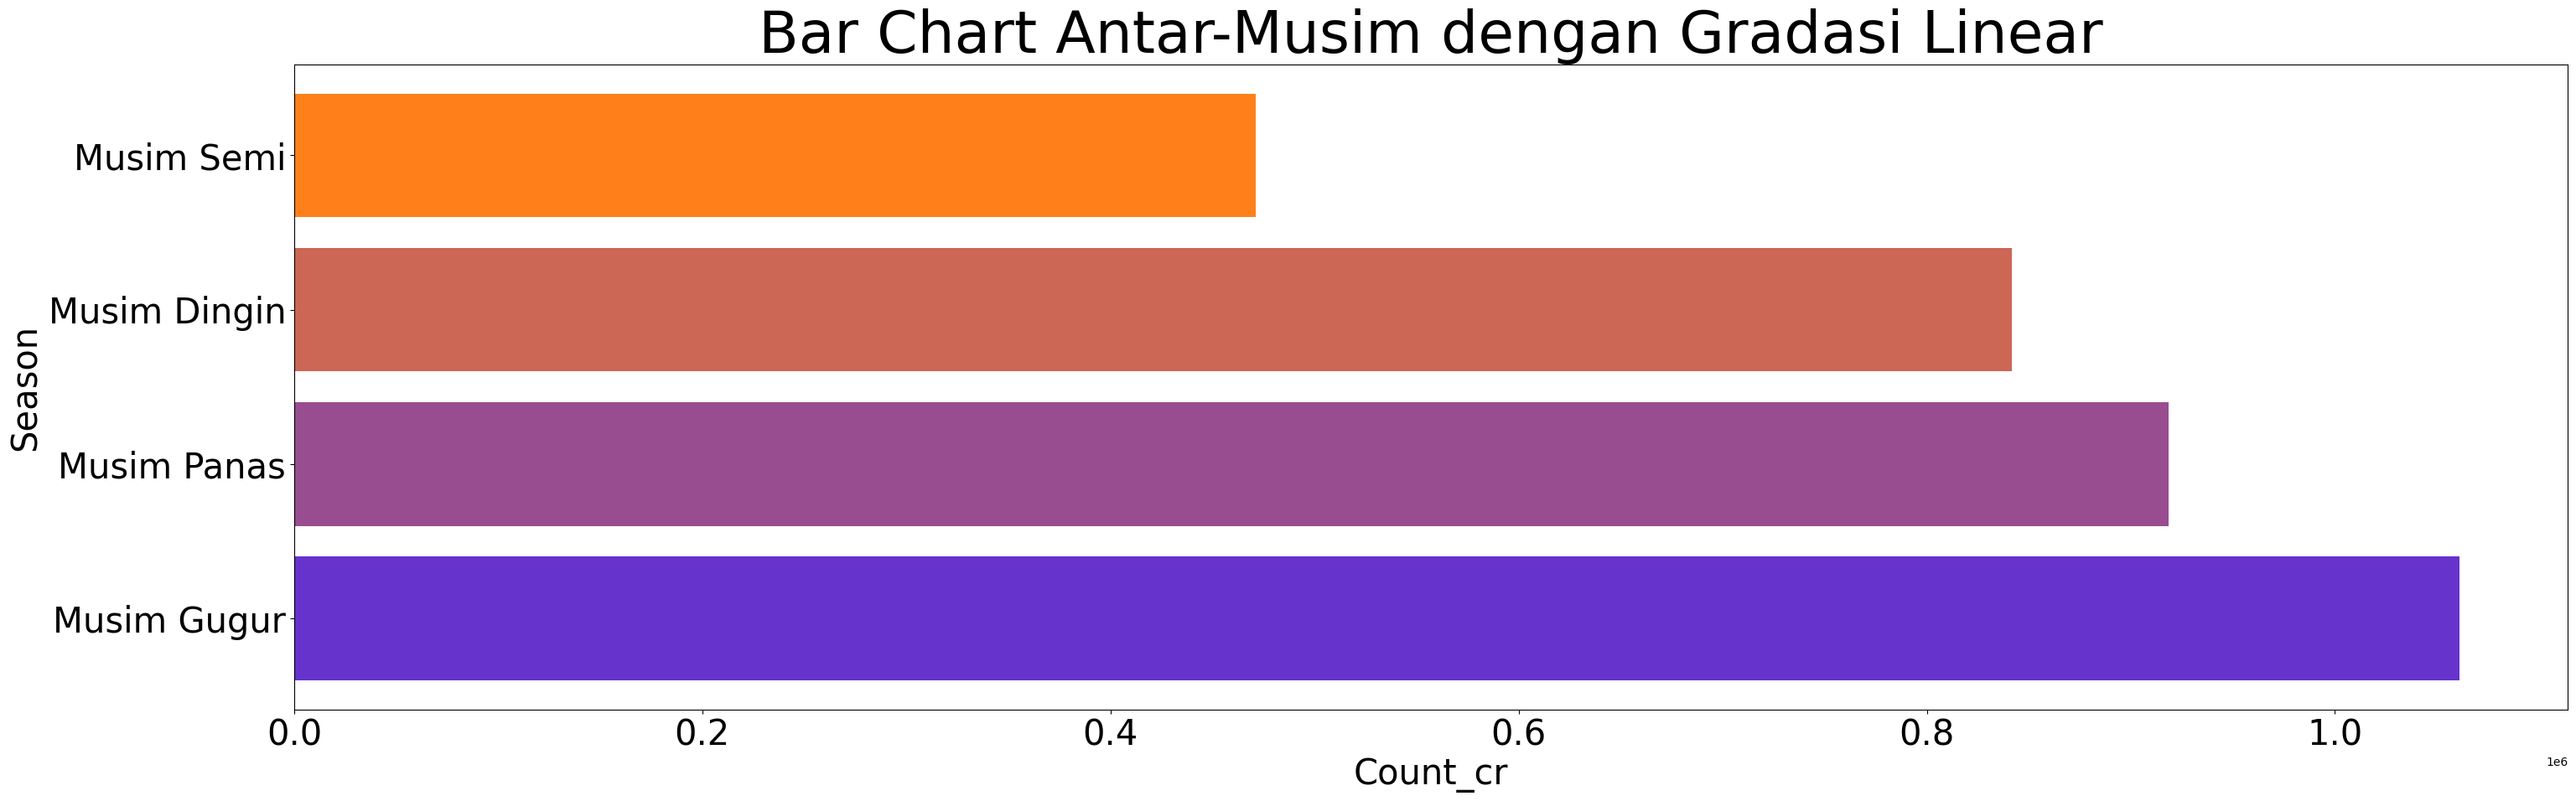

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate gradient colors
def generate_gradient_color(start_color, end_color, n_colors):
    return [
        np.linspace(start_color[i], end_color[i], n_colors)
        for i in range(3)
    ]

# Define gradient colors (from purple to orange)
start_color = np.array([0.4, 0.2, 0.8])  # Purple (RGBA)
end_color = np.array([1.0, 0.5, 0.1])    # Orange (RGBA)
n_colors = len(grouped_day)
gradient_colors = np.array(generate_gradient_color(start_color, end_color, n_colors)).T

# Visualisasi dengan gradient warna
fig, ax = plt.subplots(figsize=(35, 10))

bars = plt.barh(
    grouped_day.index,
    grouped_day["count_cr"],
    color=gradient_colors
)

# Styling axes and title
ax.set_title("Bar Chart Antar-Musim dengan Gradasi Linear", loc="center", fontsize=50)
ax.set_ylabel('Season', fontsize=30)
ax.set_xlabel('Count_cr', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# Show plot
plt.show()

Dari visualisasi ini menunjukkan bahwa musim dengan penyewaan terbanyak adalah *Musim Gugur* dengan jumlah 1,061,129, sedangkan yang paling sedikit atau jarang adanya penyewaan sepeda adalah *Musim Semi* dengan Jumlah 471,348

---

### Pertanyaan 2: Bagaimana faktor cuaca (weathersit) memengaruhi jumlah penyewaan sepeda harian?

In [54]:
sum_order_items_df = hour.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

In [55]:
hour_count = sum_order_items_df.groupby('hours')['count_cr'].sum().reset_index()

In [56]:
hour_count

,hours,count_cr
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


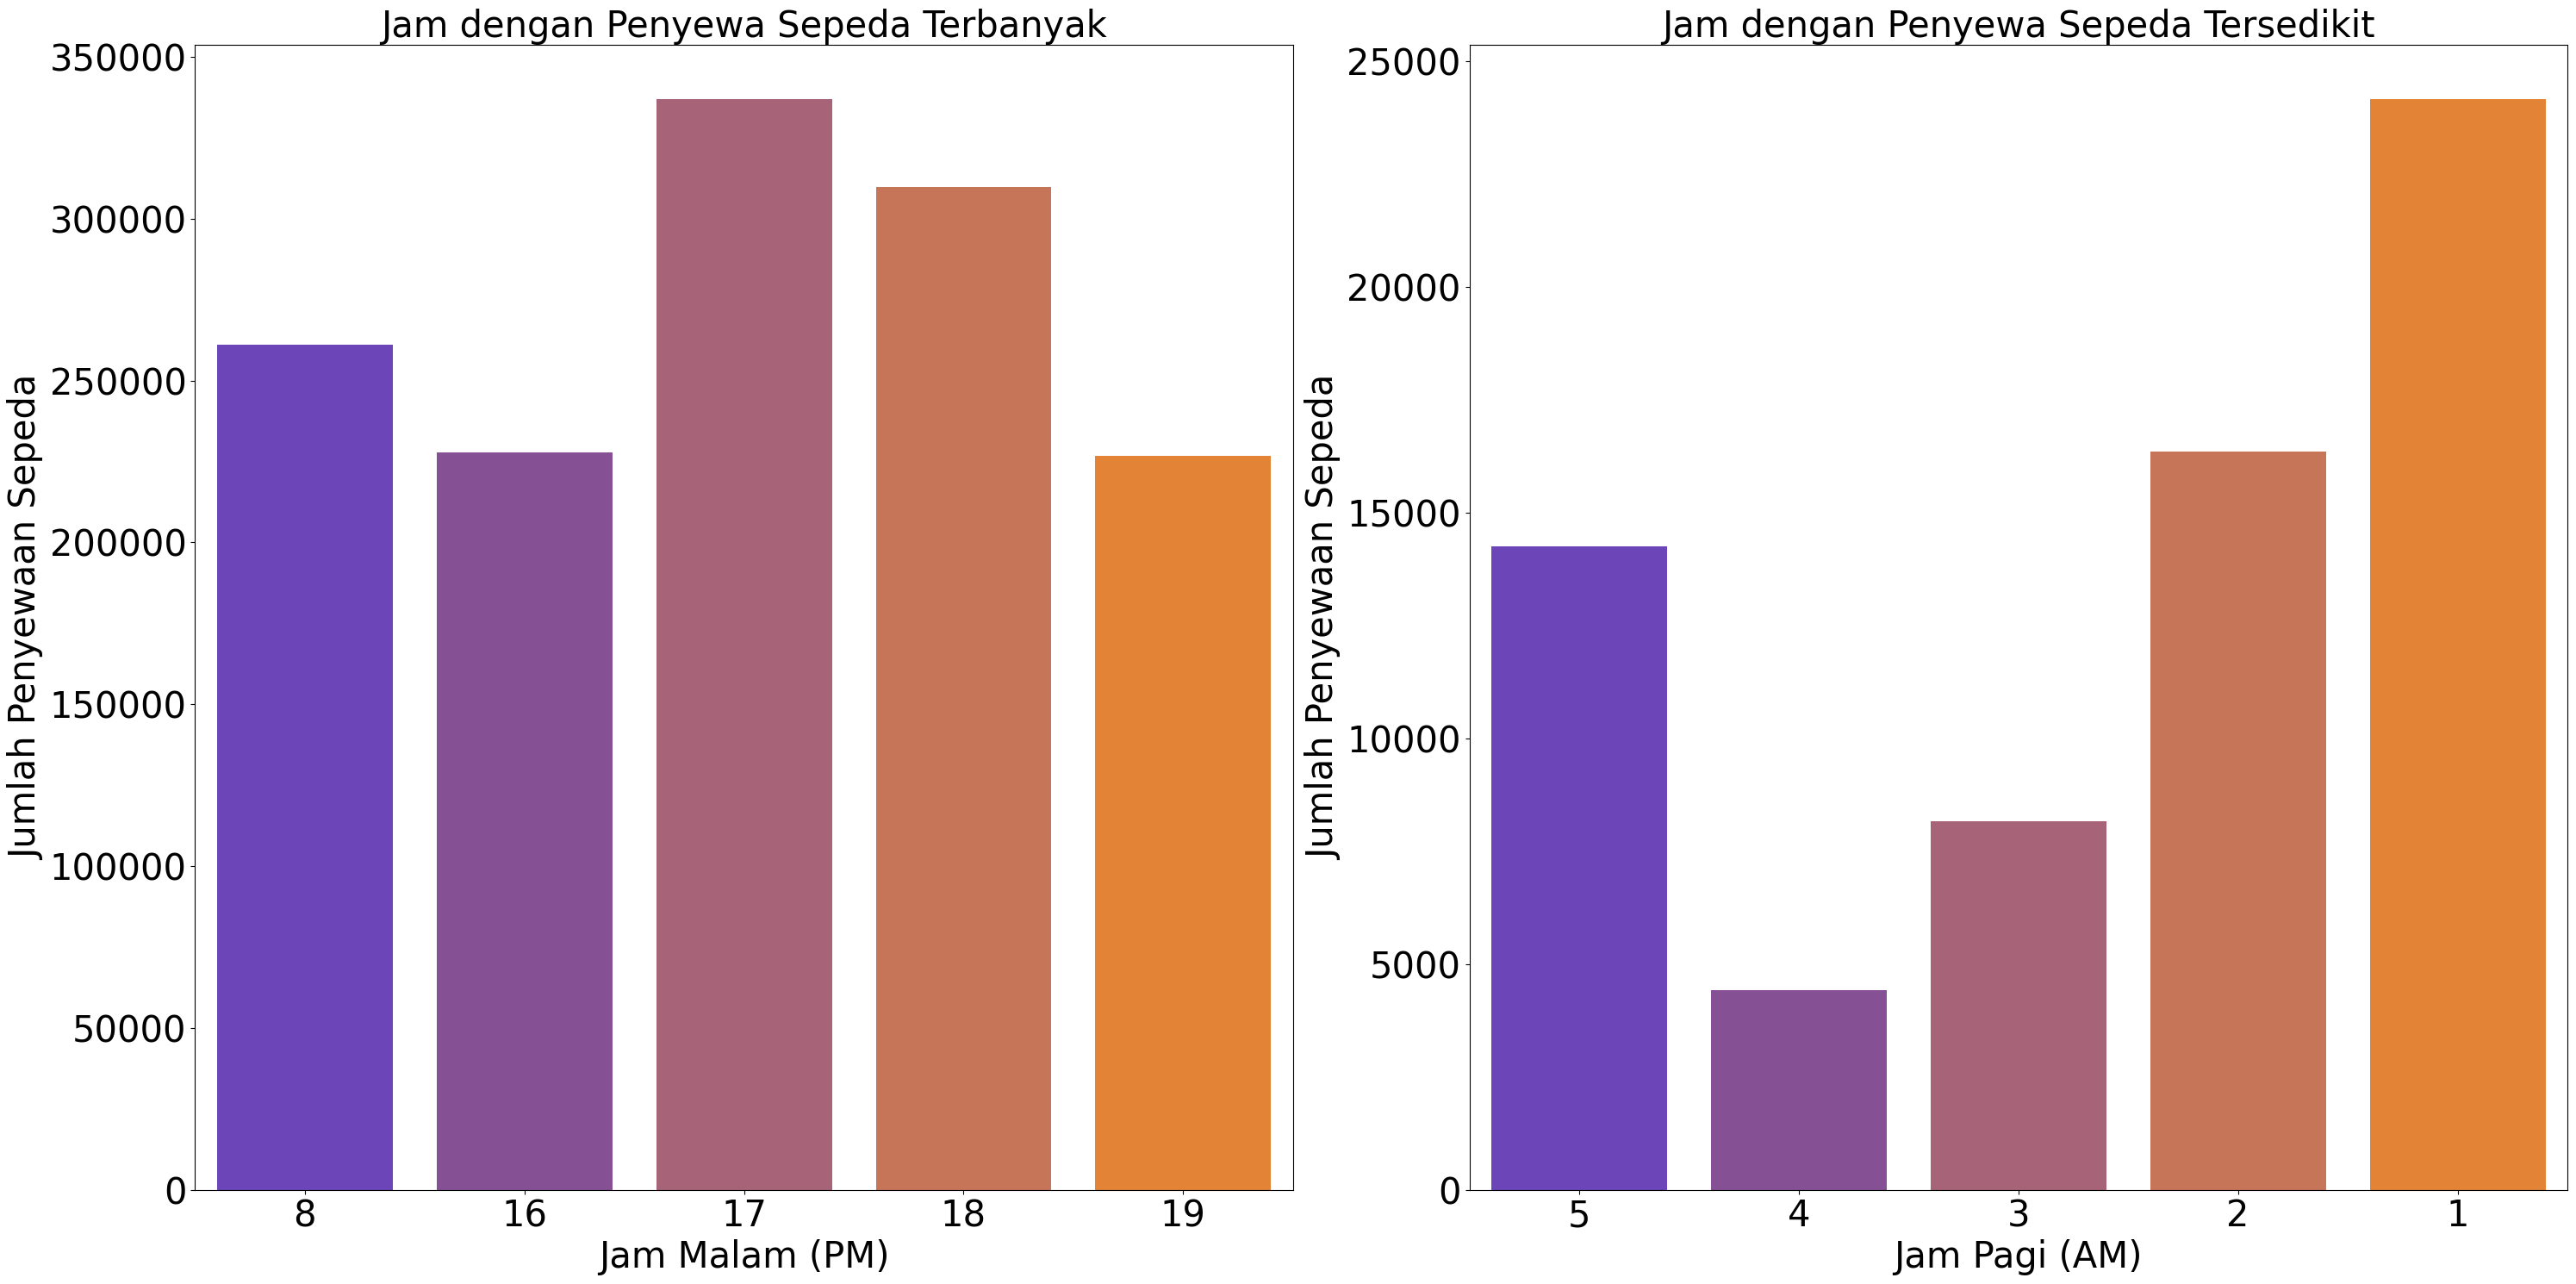

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Fungsi untuk membuat gradasi warna
def generate_gradient_color(start_color, end_color, n_colors):
    return [
        np.linspace(start_color[i], end_color[i], n_colors)
        for i in range(3)
    ]

# Warna awal dan akhir (purple ke orange)
start_color = np.array([0.4, 0.2, 0.8])  # Purple
end_color = np.array([1.0, 0.5, 0.1])    # Orange

# Generate gradasi warna untuk top dan least rentals
top_gradient = np.array(generate_gradient_color(start_color, end_color, 5)).T
least_gradient = np.array(generate_gradient_color(end_color, start_color, 5)).T

# Ubah array menjadi list
top_colors = [tuple(color) for color in top_gradient]
least_colors = [tuple(color) for color in least_gradient]

# Mengurutkan berdasarkan penyewa terbanyak dan sedikit
top_rentals = hour_count.sort_values(by="count_cr", ascending=False).head(5)
least_rentals = hour_count.sort_values(by="count_cr", ascending=True).head(5)

# Membuat plot dengan dua sub-plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 15))

# Plot untuk jam dengan penyewa terbanyak
sns.barplot(
    x="hours",
    y="count_cr",
    data=top_rentals,
    hue="hours",  # Menambahkan 'hue' pada x untuk menghindari warning
    palette=top_colors,
    ax=ax[0],
    legend=False  # Matikan legend
)
ax[0].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=30)
ax[0].set_xlabel("Jam Malam (PM)", fontsize=30)
ax[0].set_title("Jam dengan Penyewa Sepeda Terbanyak", loc="center", fontsize=30)
ax[0].tick_params(axis='x', labelsize=30)
ax[0].tick_params(axis='y', labelsize=30)

# Plot untuk jam dengan penyewa paling sedikit
sns.barplot(
    x="hours",
    y="count_cr",
    data=least_rentals,
    hue="hours",  # Menambahkan 'hue' pada x untuk menghindari warning
    palette=least_colors,
    ax=ax[1],
    legend=False  # Matikan legend
)
ax[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=30)
ax[1].set_xlabel("Jam Pagi (AM)", fontsize=30)
ax[1].set_title("Jam dengan Penyewa Sepeda Tersedikit", loc="center", fontsize=30)
ax[1].invert_xaxis()  # Invert x-axis untuk tampilan jam pagi
ax[1].tick_params(axis='x', labelsize=30)
ax[1].tick_params(axis='y', labelsize=30)

# Tampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi yang saya hasilkan ini menunjukkan bahwa penyewaan sepeda itu paling sering digunakan pada waktu pukul 17:00 dengan jumlah 336,860, sedangkan waktu penyewaan paling sedikit adalah pada pukul 04:00 dengan Jumlah 4,428

---


### Pertanyaan 3: Berapa banyak Total Penyewaan Setiap Disetiap Bulannya?

In [58]:
day['month'] = pd.to_datetime(day['dteday']).dt.month
day['month_name'] = day['month'].map(mappings['month'])

day['month_name'] = pd.Categorical(day['month_name'], categories=mappings['month'].values(), ordered=True)

monthly_revenue = day.groupby('month_name', observed=True)['count_cr'].sum()

In [59]:
monthly_revenue

,count_cr
month_name,
Januari,134933
Febuari,151352
Maret,228920
April,269094
Mei,331686
Juni,346342
Juli,344948
Agustus,351194
September,345991


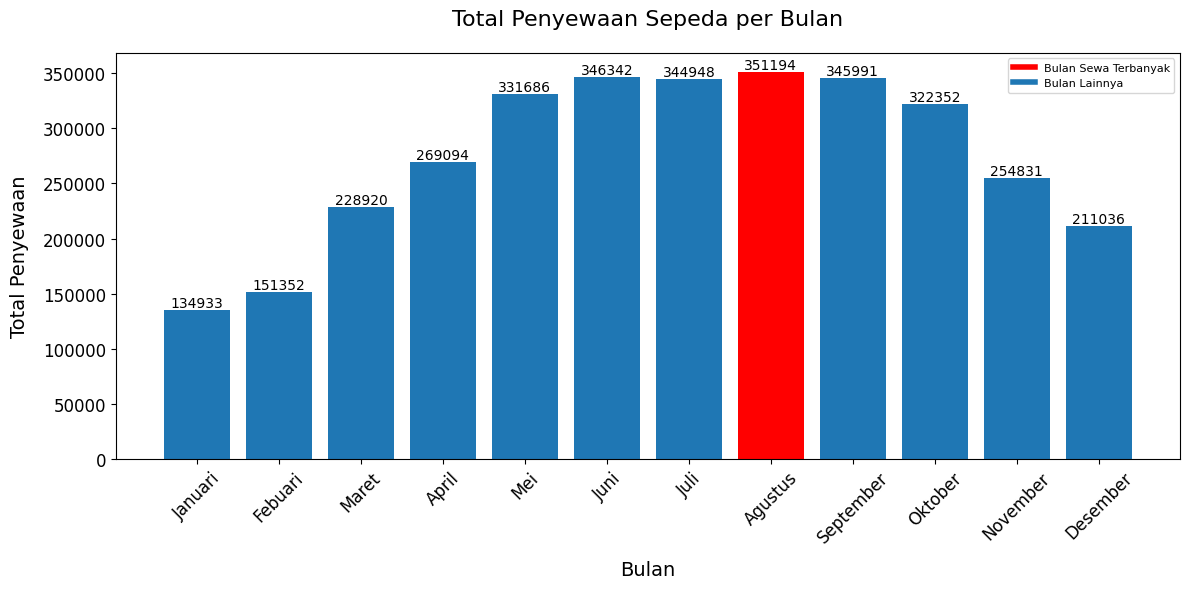

In [60]:
colors = ['tab:blue' if month != 'Agustus' else 'red' for month in monthly_revenue.index]

# Membuat bar chart dengan ukuran yang lebih proporsional
plt.figure(figsize=(12, 6))  # Lebar dan tinggi lebih proporsional untuk Streamlit
bars = plt.bar(monthly_revenue.index, monthly_revenue.values, color=colors)

# Menambahkan legend untuk warna
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Bulan Sewa Terbanyak')
blue_patch = plt.Line2D([0], [0], color='tab:blue', lw=4, label='Bulan Lainnya')
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=8)

# Menambahkan judul dan label
plt.title('Total Penyewaan Sepeda per Bulan', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=14, labelpad=10)
plt.ylabel('Total Penyewaan', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)  # Agar label bulan lebih jelas
plt.yticks(fontsize=12)

# Menambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5,  # Posisi teks
        f'{int(height)}',  # Menampilkan nilai dalam format integer
        ha='center', va='bottom', fontsize=10
    )

# Menampilkan grafik
plt.tight_layout()
plt.show()

Bisa kita lihat bahwa Penyewaan / Penyewaan sepeda terbanyak dalam kategori bulanan itu adalah bulan Agustus dengan jumlah 351,194

## **4. Analisis Lanjutan**

## 4.1 RFM Analysis

Dalam Penyewaan Sepeda, kita dapat mengadaptasi konsep RFM untuk:

*   Recency: Hari terakhir pengguna meminjam sepeda, semakin kecil *recency* menandakan baru bertransaksi
*   Frequency: Jumlah total penyewaan sepeda oleh pengguna.
*   Monetary: Total durasi atau jumlah penyewaan sepeda, semakin besar *monetary* menandakan pengeluarannya untuk meminjam sepeda besar

In [72]:
# Convert 'dteday' to datetime and calculate recency
day['last_purchase_date'] = pd.to_datetime(day['dteday'])
current_date = day['last_purchase_date'].max()
day['recency'] = (current_date - day['last_purchase_date']).dt.days

# Calculate Frequency and Monetary
frequency = (
    day.groupby('instant')
    .size()
    .reset_index(name='frequency')
)

monetary = (
    day.groupby('instant')['count_cr']
    .sum()
    .reset_index(name='monetary')
)

# Merge Frequency and Monetary into a single DataFrame
rfm = pd.merge(frequency, monetary, on='instant')

# Add Recency (minimum per instant)
rfm = pd.merge(
    rfm,
    day.groupby('instant')['recency'].min().reset_index(name='recency'),
    on='instant'
)

# Assign customer segments based on rules
rfm['customer_segment'] = rfm.apply(
    lambda x: 'Registered' if x['frequency'] > 5 or x['monetary'] > 1000 else 'Casual',
    axis=1
)

# Display the RFM DataFrame
print(rfm)


     instant  frequency  monetary  recency customer_segment
0          1          1       985      730           Casual
1          2          1       801      729           Casual
2          3          1      1349      728       Registered
3          4          1      1562      727       Registered
4          5          1      1600      726       Registered
..       ...        ...       ...      ...              ...
726      727          1      2114        4       Registered
727      728          1      3095        3       Registered
728      729          1      1341        2       Registered
729      730          1      1796        1       Registered
730      731          1      2729        0       Registered

[731 rows x 5 columns]


Disini saya menampilkan range dari data 0 hingga 730, bisa kita lihat contohnya transaksi terbaru itu dilakukan oleh data ke 730 atau *recency* = 0 dengan *monetary* sebesar 2729 dan Tipe Pengguna yang sudah teregistrasi

---

In [71]:
top_5_monetary = rfm.sort_values(by='monetary', ascending=False).head(5)

print(top_5_monetary)

     instant  frequency  monetary  recency customer_segment
623      624          1      8714      107       Registered
637      638          1      8555       93       Registered
630      631          1      8395      100       Registered
447      448          1      8362      283       Registered
504      505          1      8294      226       Registered


Disini saya menampilkan *monetary* terbesar atau terbanyak itu adalah sebesar 8714 oleh pengguna dengan *recency* = 107 dan Tipe Pengguna yang sudah Teregistrasi

---

## 4.2 Clusterring

### 4.2.1 Clusterring Pengguna dari data RFM

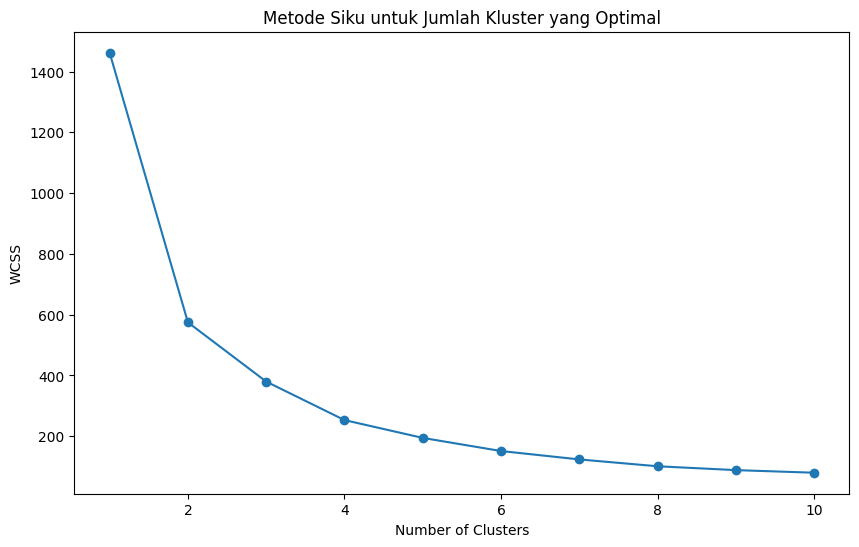

In [63]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Siku untuk Jumlah Kluster yang Optimal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [64]:
rfm

,instant,frequency,monetary,recency,customer_segment,Cluster
0,1,1,985,730,Casual,2
1,2,1,801,729,Casual,2
2,3,1,1349,728,Registered,2
3,4,1,1562,727,Registered,2
4,5,1,1600,726,Registered,2
...,...,...,...,...,...,...
726,727,1,2114,4,Registered,0
727,728,1,3095,3,Registered,1
728,729,1,1341,2,Registered,0
729,730,1,1796,1,Registered,0


Cluster di atas dapat diartikan sebagai berikut:


*   Cluster 0 = Pengguna yang cenderung melakukan transaksi dengan jumlah *Monetary* yang menengah. Mereka cenderung memiliki *Recency* yang lebih tinggi, menunjukkan bahwa mereka telah melakukan transaksi lebih lama.
*   Cluster 1 = Pengguna dengan *Monetary* yang lebih tinggi dan Recency yang lebih rendah. Ini adalah pengguna yang relatif baru dan melakukan transaksi dengan jumlah uang yang besar.
*   Cluster 2 = Pengguna dengan *Monetary* yang lebih rendah dan Recency yang lebih tinggi. Mereka adalah pengguna yang sudah lama melakukan transaksi tetapi dengan jumlah yang lebih kecil.

---


### 4.2.2 Clusterring Manual Group Humidity

In [69]:
# Group by 'humidity_category' and count rows in 'count_cr'
result = (
    hour
    .groupby("humidity_category")
    .count()[["count_cr"]]
    .rename(columns={"count_cr": "total_count"})
)

# Sort the results in descending order
sorted_result = result.sort_values(by="total_count", ascending=False)

# Print the sorted results
print(sorted_result)


                   total_count
humidity_category             
Lembab                    8356
Ideal                     5505
Kering                    3518


BIsa kita lihat dari data **hour** bahwa pengguna akan lebih sering meminjam di keadaan *humidity* Lembab dibandingkan *Humidity* Kering

---

### 4.2.3 Clusterring Manual Group Weather Situation

In [66]:
count_weather = hour.groupby(by="weather_situation", observed=False).size().sort_values(ascending=False)

print(count_weather)

weather_situation
Cerah           11413
Mendung          4544
Hujan Ringan     1419
Hujan Lebat         3
dtype: int64


Bisa kita lihat dari data **hour** bahwa pengguna penyewaan sepedah lebih cenderung meminjam sepeda ketika cuacanya itu *Cerah* dengan 11413, dan ada juga pengguna yang meminjam ketika *Hujan Lebat* = 3


---

## Conclusion

- Conclution Pertanyaan 1 : Bagaimana faktor cuaca (weathersit) memengaruhi jumlah penyewaan sepeda harian?
- Conclution Pertanyaan 2 : Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja (workingday) dan akhir pekan/libur?
- Conclution Pertanyaan 3 : Berapa banyak Total Penyewaan Setiap Disetiap Bulannya?

- Pertanyaan 1 : Berdasarkan visualisasi yang saya berikan itu sudah menjawab pertanyaan, dimana saya menampilkan penyewaan antar musim dan memplotkannya dalam kategori 4 musim yang dimana *Musim Gugur* adalah musim yang paling sering untuk orang menyewa sepeda. Hal ini bisa didasarkan oleh cuacanya yang sejuk dan nyaman, dan pemandangan alamnya yang indah nan menawan.
- Pertanyaan 2 : Berdasarkan visualisasi yang saya berikan itu sudah sangat menjawab pertanyaan, dimana saya menampilkan penyewaan dalam range terbanyak dan tersedikit, yang dimana pada pukul 17:00 adalah pukul terbanyak orang menyewa sepeda dan pada pukul 04:00 adalah paling sedikit orang menyewa sepeda, yang dapat kita simpulkan pada range pukul 01:00 hingga 05:00 adalah waktu Istirahat dan pada pukul 17:00 adalah waktu untuk pulang bekerja.
- Pertanyaan 3 : Berdasarkan visualisasi yang saya berikan itu sudah sangat menjawab pertanyaan, dimana saya menampilkan jumlah total penyewaan setiap bulannya dan menentukan juga bulan dengan penyewaan terbanyak yaitu bulan Agustus dengan jumlah penyewaan 351,194


In [67]:
day.to_csv('main_data_day.csv', index=False)

In [68]:
hour.to_csv('main_data_hour.csv', index=False)